In [1]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties
import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

In [2]:
# 获取当前目录
current_directory = os.getcwd()

# 构建文件路径
file_path = os.path.join(current_directory, "merged_data_final.csv")

# 使用 pandas 的 read_csv() 函数读取 CSV 文件并创建 DataFrame
df = pd.read_csv(file_path)

df


C:\Users\Eason\AppData\Local\Temp\ipykernel_319760\2004348083.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
12749345,2350559,菌烨tako,NaN,NaN,4,1659457018976,NaN,NaN,NaN,996
12749346,2350559,菌烨tako,NaN,NaN,4,1659124809320,NaN,NaN,NaN,996
12749347,2059591,性巴莎拉,NaN,NaN,4,1656072510180,NaN,NaN,NaN,996
12749348,11605312,青鸢Cyan-,娱乐,舞见,4,1664028253867,NaN,NaN,NaN,998


In [3]:
df

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
12749345,2350559,菌烨tako,NaN,NaN,4,1659457018976,NaN,NaN,NaN,996
12749346,2350559,菌烨tako,NaN,NaN,4,1659124809320,NaN,NaN,NaN,996
12749347,2059591,性巴莎拉,NaN,NaN,4,1656072510180,NaN,NaN,NaN,996
12749348,11605312,青鸢Cyan-,娱乐,舞见,4,1664028253867,NaN,NaN,NaN,998


In [4]:
def generate_cloud(kind):
    text_data = df[kind].astype(str)
    text_data = text_data.dropna()

    text = ' '.join(text_data.unique())

    font_path = 'ZiYuYongSongTi-2.ttf'

    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


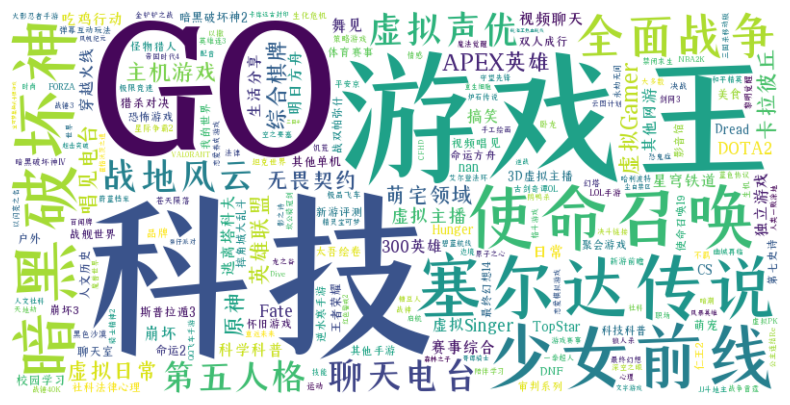

In [5]:
generate_cloud('cArea')

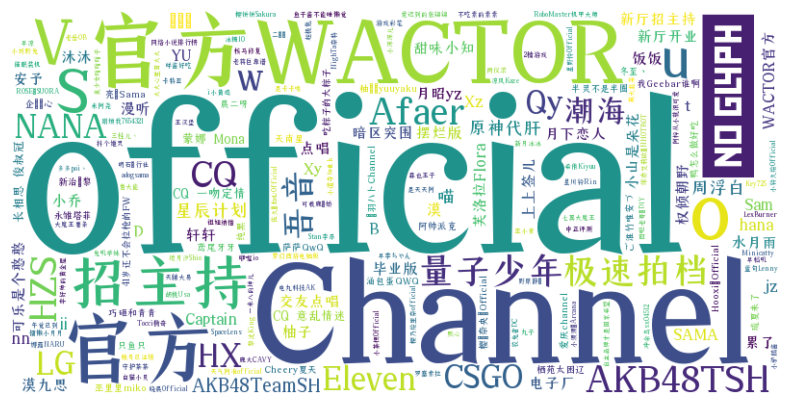

In [6]:
generate_cloud('cUname')

In [7]:
counts = df['cUname'].value_counts().sort_values(ascending=False)
counts = pd.DataFrame(counts)
counts

,cUname
眞白花音_Official,286404
七海Nana7mi,159791
老实憨厚的笑笑,119964
C酱です,113330
魔狼咪莉娅,108591
...,...
金戈药商白止,1
Endeavour♡,1
阿苒苒与富坚坚,1
宋书航呀-满月版,1


In [8]:
pay_list = df.groupby('uid')['price'].sum().sort_values(ascending=False)
pay_list = pd.DataFrame(pay_list)
pay_list['ranking'] = [i+1 for i in range(len(pay_list))]
pay_list.reset_index(inplace=True)
pay_list

,uid,price,ranking
0,145,1096405.60,1
1,203110,441959.20,2
2,2,345133.92,3
3,99,239476.60,4
4,202460,213422.60,5
...,...,...,...
34130,90316963,0.00,34131
34131,90316953,0.00,34132
34132,90316943,0.00,34133
34133,90316941,0.00,34134


In [9]:
pay_list[pay_list['price']>=400000]

,uid,price,ranking
0,145,1096405.6,1
1,203110,441959.2,2


In [10]:
me=df.merge(pay_list[pay_list['price']>=2000],on='uid')
me

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price_x,count,uid,price_y,ranking
0,1600113,萌爱moi,娱乐,舞见,4,1688320866439,NaN,NaN,NaN,101,3800.0,189
1,15049310,青稞芋泥陶可爱,娱乐,舞见,4,1687518744944,NaN,NaN,NaN,101,3800.0,189
2,1363457,米团团Miho,虚拟主播,虚拟日常,4,1686928323085,NaN,NaN,NaN,101,3800.0,189
3,6964745,有希小酱,娱乐,视频唱见,4,1686674056566,NaN,NaN,NaN,101,3800.0,189
4,23309612,我是娜娜啊啊啊,娱乐,视频聊天,4,1686674119025,NaN,NaN,NaN,101,3800.0,189
...,...,...,...,...,...,...,...,...,...,...,...,...
3598509,375504219,湊-阿库娅Official,NaN,NaN,0,1580995739000,探个头,NaN,NaN,995,2755.3,224
3598510,375504219,湊-阿库娅Official,NaN,NaN,0,1580995774000,准备道歉,NaN,NaN,995,2755.3,224
3598511,375504219,湊-阿库娅Official,NaN,NaN,0,1580995897000,SC大气,NaN,NaN,995,2755.3,224
3598512,375504219,湊-阿库娅Official,NaN,NaN,0,1580996089000,回家了回家了,NaN,NaN,995,2755.3,224


In [11]:
def generate_cloud(kind, price,type):
    me=df.merge(pay_list[pay_list['price']>=price],on='uid')
    text_data = me[me['type']==type][kind].astype(str)
    text_data = text_data.replace('nan',np.nan)
    text_data = text_data.dropna()
    print(text_data)

    text = ' '.join(text_data.unique())

    font_path = 'ZiYuYongSongTi-2.ttf'

    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

8236         虚拟Gamer
8237            萌宅领域
8238        虚拟Singer
8239            赛事综合
8240            虚拟日常
              ...   
12749339        萌宅领域
12749340        独立游戏
12749341        视频聊天
12749348          舞见
12749349          舞见
Name: cArea, Length: 4480415, dtype: object


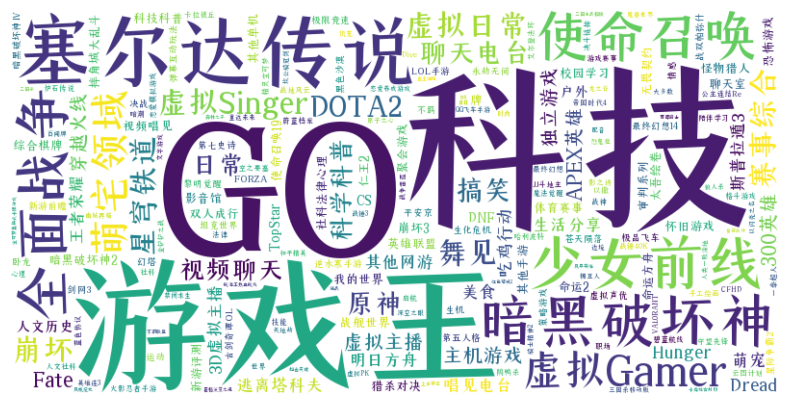

In [12]:
generate_cloud('cArea',0,4)

In [13]:
def d2d(d):
    timestamp_str = float(d) # 将字符串转换为整数或浮点数（如果是浮点数时间戳）
    timestamp = float(timestamp_str) / 1000 # 转换为以秒为单位的时间戳 # 使用 datetime 模块将时间戳转换为标准时间
    dt = datetime.datetime.fromtimestamp(timestamp) # 打印标准时间 print(dt)
    print(dt)

In [14]:

d2d(1689609850169)

2023-07-18 00:04:10.169000


In [15]:
df['cArea'].value_counts()

虚拟主播        1487699
虚拟日常         641309
主机游戏         530054
英雄联盟         367055
虚拟Singer     323849
             ...   
洛克王国              2
重返帝国              1
无主之地3             1
300大作战            1
鬼泣-巅峰之战           1
Name: cArea, Length: 347, dtype: int64

In [16]:
counts = df['cArea'].value_counts()

points = []
weights = []
for count in counts.values:
    points.append([count, count])  # 使用 count 值作为节点的坐标
    weights.append(count)  # 使用 count 值作为节点的权重
points = np.array(points)
weights = np.array(weights)

# 构建 Voronoi 图
vor = Voronoi(points)

# 对 Voronoi 图中的每个区域进行加权
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        # 过滤掉无效区域
        valid_region = [vor.vertices[j] for j in region if j != -1]
        valid_weights = [weights[j] for j in region if j != -1]

        # 计算区域的相对权重
        weight_sum = np.sum(valid_weights)

        # 计算加权质心
        weighted_center = np.dot(valid_region, valid_weights) / weight_sum

        # 更新 Voronoi 图的顶点位置
        vor.vertices[i] = weighted_center

# 绘制加权质心的 Voronoi 树图
fig, ax = plt.subplots(figsize=(10, 10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=2, line_alpha=0.6)

# 设置坐标轴范围
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])

# 显示绘图结果
plt.show()

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull v Qbb Qz Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 33534253  voronoi  Qbbound-last  Qz-infinity-point  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  Pgood  _max-width 1.5e+06
  Error-roundoff 2.1e-09  _one-merge 1.4e-08  Visible-distance 4.1e-09
  U-max-coplanar 4.1e-09  Width-outside 8.3e-09  _wide-facet 2.5e-08
  _maxoutside 1.7e-08

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v4): 6.4e+05 6.4e+05 2.5e+05
- p347(v3): 2.4e+04 2.4e+04 1.5e+06
- p0(v2): 1.5e+06 1.5e+06 1.4e+06
- p343(v1):     1     1     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.1e-09.  The center point, facets and distances
to the center point are as follows:

center point 5.382e+05 5.382e+05 7.729e+05

facet p347 p0 p343 distance=    0
facet p1 p0 p343 distance=    0
facet p1 p347 p343 distance=    0
facet p1 p347 p0 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         1  1.488e+06  difference= 1.488e+06
  1:         1  1.488e+06  difference= 1.488e+06
  2:         0  1.488e+06  difference= 1.488e+06

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.1e-09.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.
